<a href="https://colab.research.google.com/github/W83w/-Courses/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Конечная цель ИИ: предсказание цены сбыта ноутбуков и изменение цены с течением времени. Востребована для новых компаний, расчета самой финальной цены и изменение цены со временем. Предсказанные цены могут координально изменить планы компании. Решено было создать три модели. Две для расчета цены из за их не точности, третья же для расчета цены за которую продают характеристики ноутбука. Это также поможет для подсчета возможной выручки.



Импортирую пандас

In [ ]:
import pandas as pd

Импортирую numpy

In [ ]:
import numpy as np

Загружаю Датасет. Для начала, я возвращаю съехавшие названия.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaned_Laptop_data.csv', header=None, skiprows=1)
df.columns = ['brand','model','processor_brand','processor_name','processor_gnrtn',
              'ram_gb','ram_type','ssd','hdd','os','os_bit','graphic_card_gb',
              'weight','display_size','warranty','Touchscreen','msoffice',
              'latest_price','old_price','discount','star_rating',
              'ratings','reviews']
df
df.head()


,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


Устанавливаю tslearn и импоритрую TimeSeriesKMeans и to_time_series_dataset

In [ ]:
!pip install tslearn
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.8/875.8 KB 15.4 MB/s eta 0:00:00


Вывожу бренды процессоров и первые 3 строки, что бы все проверить.

In [ ]:
processor_brand_num = list(set(df['processor_brand']))
print(processor_brand_num)
df.head(3)


['Intel', 'M1', 'AMD', 'Qualcomm', 'MediaTek']


,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159


Избавляюсь от слов. Провожу следующие действия с 1 колонкой.


In [ ]:
d = {} 
for i in range(len(df['processor_brand'])):
  d.update({df['processor_brand'][i]: i})
print(d)

{'AMD': 895, 'Intel': 820, 'M1': 678, 'MediaTek': 727, 'Qualcomm': 894}


Создаю новую колонку с цифрами вместо слов. Это нужно для одной из моделей.

In [ ]:
df['processor_brand_num'] = ''
#Добавляю столбец
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews,processor_brand_num
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,0,No,No,24990,32790,23,3.7,63,12,
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,0,No,No,19590,21325,8,3.6,1894,256,
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,0,No,No,19990,27990,28,3.7,1153,159,
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,0,No,No,21490,27990,23,3.7,1153,159,
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,0,No,No,24990,33490,25,3.7,1657,234,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,1,No,No,144990,194990,25,0.0,0,0,
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,1,No,No,149990,0,0,0.0,0,0,
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,1,No,No,142990,0,0,0.0,0,0,
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,0,No,No,38990,47990,18,0.0,0,0,


Перебираю все строки в новый столбец. Новый столбец с данными из списка со словами переформатированными в цифры.

In [ ]:
for index, row in df.iterrows():
  #print(index)
  df['processor_brand_num'].iloc[index] = d[row['processor_brand']]  
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews,processor_brand_num
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,0,No,No,24990,32790,23,3.7,63,12,895
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,0,No,No,19590,21325,8,3.6,1894,256,895
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,0,No,No,19990,27990,28,3.7,1153,159,895
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,0,No,No,21490,27990,23,3.7,1153,159,895
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,0,No,No,24990,33490,25,3.7,1657,234,895


Создаю еще несколько столбцов.

In [ ]:
df['brand_num'] = ''
df['processor_name_num'] = ''
df['processor_gnrtn_num'] = ''
df['ram_type_num'] = ''
df['os_num'] = ''
df['display_size_num'] = ''
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,star_rating,ratings,reviews,processor_brand_num,brand_num,processor_name_num,processor_gnrtn_num,ram_type_num,os_num,display_size_num
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,3.7,63,12,895,,,,,,
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,3.6,1894,256,895,,,,,,
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,3.7,1153,159,895,,,,,,
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,3.7,1153,159,895,,,,,,
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,3.7,1657,234,895,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,0.0,0,0,895,,,,,,
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,0.0,0,0,895,,,,,,
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,0.0,0,0,895,,,,,,
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,0.0,0,0,894,,,,,,


Перебираю столбец с данными, которые, получил ранее, они меньше 1.

Так как модель понимает цифры от -1 до 1, привожу данные в такой вид, деля все на 1000.

In [ ]:
d = {} 
for i in range(len(df['processor_name'])):
  i1 = i/1000
  d.update({df['processor_name'][i]: i1})
print(d)


d1 = {} 
for i in range(len(df['processor_gnrtn'])):
  i1= i/ 1000
  d1.update({df['processor_gnrtn'][i]: i1})
print(d1)

d2 = {} 
for i in range(len(df['ram_type'])):
  i1 = i / 1000
  d2.update({df['ram_type'][i]: i1})
print(d2)

d3 = {} 
for i in range(len(df['os'])):
  i1 = i / 1000
  d3.update({df['os'][i]: i1})
print(d3)

d4 = {} 
for i in range(len(df['display_size'])):
  i1 = i / 1000
  d4.update({df['display_size'][i]: i1})
print(d4)

d5 = {}
for i in range(len(df['brand'])):
  i1 = i / 1000
  d5.update({df['brand'][i]: i1})
print(d5)


{'A6-9225 Processor': 0.0, 'APU Dual': 0.007, 'Athlon Dual': 0.009, 'Core i3': 0.204, 'Core i5': 0.642, 'Celeron Dual': 0.212, 'Ryzen': 0.019, 'Ryzen 5': 0.895, 'Core': 0.213, 'Core i7': 0.643, 'Core i9': 0.636, 'Core m3': 0.637, 'Dual Core': 0.644, 'Ever Screenpad': 0.646, 'GeForce GTX': 0.648, 'GeForce RTX': 0.679, 'GEFORCE RTX': 0.652, 'Hexa Core': 0.654, 'M1': 0.678, 'Genuine Windows': 0.698, 'Pentium Quad': 0.695, 'Pentium Silver': 0.697, 'Ryzen 3': 0.724, 'MediaTek Kompanio': 0.727, 'Quad': 0.755, 'Ryzen 7': 0.867, 'Ryzen 9': 0.893, 'Snapdragon 7c': 0.894}
{'10th': 0.895, 'Missing': 0.894, '11th': 0.636, '7th': 0.637, '8th': 0.626, '9th': 0.605, '4th': 0.463, '12th': 0.632}
{'DDR4': 0.895, 'LPDDR4X': 0.894, 'LPDDR4': 0.692, 'DDR5': 0.858, 'DDR3': 0.683, 'LPDDR3': 0.618}
{'Windows': 0.894, 'DOS': 0.895, 'Mac': 0.678}
{'Missing': 0.894, '14': 0.895, '15.6': 0.872, '14.96': 0.723, '15': 0.287, '14.1': 0.241, '12.2': 0.637, '13.3': 0.863, '17.3': 0.817, '13': 0.613, '16': 0.893, '14.

Заполняю новые столбцы.

In [ ]:
for index, row in df.iterrows():
  df['processor_name_num'].iloc[index] = d[row['processor_name']]
for index, row in df.iterrows():
  df['processor_gnrtn_num'].iloc[index] = d1[row['processor_gnrtn']]
for index, row in df.iterrows():
  df['ram_type_num'].iloc[index] = d2[row['ram_type']]
for index, row in df.iterrows():
  df['os_num'].iloc[index] = d3[row['os']]
for index, row in df.iterrows():
  df['display_size_num'].iloc[index] = d4[row['display_size']]
for index, row in df.iterrows():
  df['brand_num'].iloc[index] = d5[row['brand']]
df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,star_rating,ratings,reviews,processor_brand_num,brand_num,processor_name_num,processor_gnrtn_num,ram_type_num,os_num,display_size_num
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,3.7,63,12,895,0.895,0.0,0.895,0.895,0.894,0.894
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,3.6,1894,256,895,0.895,0.007,0.895,0.895,0.894,0.894
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,3.7,1153,159,895,0.612,0.007,0.895,0.895,0.894,0.894
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,3.7,1153,159,895,0.612,0.007,0.895,0.895,0.894,0.894
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,3.7,1657,234,895,0.612,0.007,0.895,0.895,0.894,0.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,0.0,0,0,895,0.893,0.893,0.894,0.895,0.894,0.893
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,0.0,0,0,895,0.893,0.893,0.894,0.895,0.894,0.894
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,0.0,0,0,895,0.893,0.893,0.894,0.895,0.894,0.893
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,0.0,0,0,894,0.894,0.894,0.894,0.894,0.894,0.894


Импортирую библиотеки для будущей модели.

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = df['processor_name_num']
y = df['display_size_num']
processor_brand_num = df['processor_brand_num']
display_size_num = df['display_size_num']  
price = df['latest_price']
processor_name_num =df['processor_name_num'] 
os_num = df['os_num']

Решено было посмотреть какие процессоры используются с разными дисплеями, различным количеством оперативной памяти, а также какая ос более востребована с каким брендом процессора. Это нужно для выявления у каких моделей самые популярные ноутбуки.

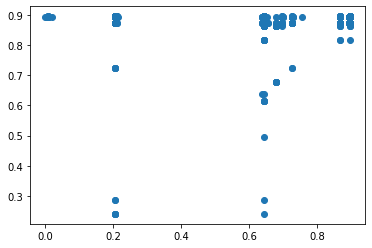

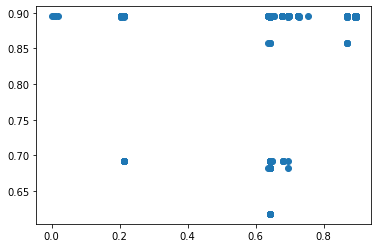

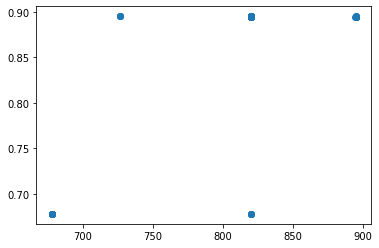

In [ ]:
plt.scatter(df['processor_name_num'], df['display_size_num'])
plt.show()
plt.scatter(df['processor_name_num'], df['ram_type_num'])
plt.show()
plt.scatter(df['processor_brand_num'], df['os_num'])
plt.show()


In [ ]:
Lenovo_df = df[df['brand'] == 'Lenovo']
Avita_df = df[df['brand'] == 'Avita']
HP_df= df[df['brand'] == 'HP']
acer_df= df[df['brand'] == 'acer']
ASUS_df= df[df['brand'] == 'ASUS']
DELL_df= df[df['brand'] == 'DELL']
DELL_df= df[df['brand'] == 'DELL']

Проведен анализ, для примерного понимания падения цены со временем на ноутбуки.

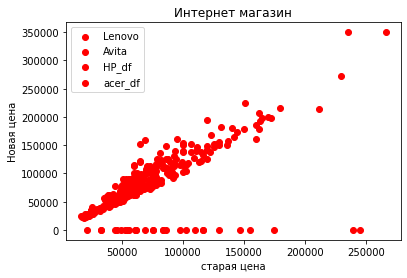

In [ ]:
plt.scatter(Lenovo_df['latest_price'], Lenovo_df['old_price'], c='r', label='Lenovo')
plt.scatter(Avita_df['latest_price'], Avita_df['old_price'], c='r', label='Avita')
plt.scatter(HP_df['latest_price'], HP_df['old_price'], c='r', label='HP_df')
plt.scatter(acer_df['latest_price'], acer_df['old_price'], c='r', label='acer_df')
plt.legend()
plt.xlabel('старая цена')
plt.ylabel('Новая цена')
plt.title('Интернет магазин')
plt.show()

Импортирую KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Признаки для будущей модели.

In [ ]:
knn = KNeighborsClassifier()

Обучаю ИИ для понимания изменения цен различных брендов ноутбуков.

In [ ]:
x = df[['brand_num', 'old_price']]
y = df['latest_price']
knn = knn.fit(x, y)

In [ ]:
test = pd.DataFrame()
test['old_price'] = [2]
test['latest_price'] = [0.5]
prediction = knn.predict(test)

print(prediction)

[21896]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- latest_price
Feature names seen at fit time, yet now missing:
- brand_num

  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
clf = SVC() 
clf.fit(x, y)
SVC()
clf.support_vectors_
clf.support_
clf.n_support_

array([ 1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  4,  1,  3,  5,
        3,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,
        5,  1,  1,  3,  1,  1,  1,  3,  1,  9,  1,  2,  6,  1,  1,  1,  7,
        1,  1,  1,  1,  1,  1,  1,  9,  2,  5,  1, 12,  1,  3,  1,  1,  2,
        1,  1,  7,  1,  1,  1,  4,  1,  1,  1, 10,  1,  1,  1,  1,  6,  1,
       11,  1,  1,  1,  2,  1,  1,  1,  2,  4,  1,  1,  1,  1,  4,  1,  1,
        1,  1,  6,  3,  1,  1,  5,  1,  1,  1,  1,  4,  1,  5,  1,  2,  1,
        1,  1, 10,  1,  1,  2,  1,  1,  1,  1, 10,  1,  4,  1,  1,  3,  1,
        1,  1,  1,  1, 10,  1,  1,  1,  1,  5,  1,  1,  1, 14,  1,  5,  1,
        9,  3,  2,  1,  1,  7,  1,  1,  1, 10,  4,  1,  1,  1,  1,  9,  1,
        5,  1, 15,  4,  1,  1,  5,  1,  1,  1,  1,  1,  1,  5,  1,  1,  1,
        1,  2,  1,  4,  1,  9,  1, 15,  1,  3,  8,  3,  2,  1,  1,  1,  3,
        1,  1,  2,  1,  2,  1,  2,  1,  1,  3,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  6,  1

In [ ]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(pred, y_test)

[ 49328.6044878   91662.7929441   72364.20317169  45744.61493458
  53649.09477536  77726.3445169   79190.7299415   78406.2755183
  42439.23795068  53633.77889717  54237.98613184  54431.52587953
  68484.78195053  65785.20129077 131480.0536836   87469.38403823
 101010.46580684  78914.02426803 141243.82792312  58467.43677447
  68738.95976372 140543.16220353  49327.18316111  97164.68675822
  92720.75981199 219790.76842914  45790.53468441 167732.4877633
  56772.22470661  86865.17680357 112241.88065936  53597.73716041
  97807.33972367  81685.86854452  58979.39373483  74119.71113474
  36777.60501008  57554.6730755  111580.55968376  70738.85561083
  71584.74573936  23387.37542733 250970.29537683  77726.3445169
  78406.2755183   52425.36442785  54842.1933665  106989.11365853
  47899.82214062 109825.05172071  88677.79850755  91040.21869546
  95852.56155675  63486.17549817  74864.00193409 129165.72530223
  55935.77836162  68716.81479335  38443.97891816  54823.59526659
 126081.53331564 140543.1622

In [ ]:
x_test[0]

array([ 0.16471752, -0.81049263])

In [ ]:
clf.support_vectors_
clf.support_
clf.n_support_

array([ 1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  4,  1,  3,  5,
        3,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,
        5,  1,  1,  3,  1,  1,  1,  3,  1,  9,  1,  2,  6,  1,  1,  1,  7,
        1,  1,  1,  1,  1,  1,  1,  9,  2,  5,  1, 12,  1,  3,  1,  1,  2,
        1,  1,  7,  1,  1,  1,  4,  1,  1,  1, 10,  1,  1,  1,  1,  6,  1,
       11,  1,  1,  1,  2,  1,  1,  1,  2,  4,  1,  1,  1,  1,  4,  1,  1,
        1,  1,  6,  3,  1,  1,  5,  1,  1,  1,  1,  4,  1,  5,  1,  2,  1,
        1,  1, 10,  1,  1,  2,  1,  1,  1,  1, 10,  1,  4,  1,  1,  3,  1,
        1,  1,  1,  1, 10,  1,  1,  1,  1,  5,  1,  1,  1, 14,  1,  5,  1,
        9,  3,  2,  1,  1,  7,  1,  1,  1, 10,  4,  1,  1,  1,  1,  9,  1,
        5,  1, 15,  4,  1,  1,  5,  1,  1,  1,  1,  1,  1,  5,  1,  1,  1,
        1,  2,  1,  4,  1,  9,  1, 15,  1,  3,  8,  3,  2,  1,  1,  1,  3,
        1,  1,  2,  1,  2,  1,  2,  1,  1,  3,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  6,  1

In [ ]:
pred = model.predict(x_test)
pred, y_test
clf.support_vectors_

array([[6.83000e-01, 1.99990e+04],
       [8.95000e-01, 2.48400e+04],
       [6.12000e-01, 2.34900e+04],
       ...,
       [6.78000e-01, 3.29900e+05],
       [6.51000e-01, 3.77798e+05],
       [8.93000e-01, 0.00000e+00]])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

Качество предсказанного.

In [ ]:
pred = model.predict(x_test)
mean_absolute_percentage_error(y_test, pred) 

0.23503986209115182

In [ ]:
modeltree = DecisionTreeRegressor(max_depth=2)
modeltree.fit(x_train, y_train) 

DecisionTreeRegressor(max_depth=2)

In [ ]:
predtree = modeltree.predict(x_test)
mean_absolute_percentage_error(y_test, predtree)

0.25815407421307035

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import plot_tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),
           'prec': 'precision'}
scoring

{'accuracy': make_scorer(accuracy_score), 'prec': 'precision'}

In [ ]:
modeltree = DecisionTreeRegressor(max_depth=2)
mean_absolute_percentage_error(y_test, predtree)

0.25815407421307035

2 модель.

Создаю экземпляр класса StandardScaler с именем scaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

Разделил вторую модель на обучающую и тестовую в процентах 70 на 30.

In [ ]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

Обучение модели K-ближайших соседей

Начинаю с импорта KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Называю вторую модель model2.

In [ ]:
model2 = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
model2.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
predictions = model.predict(x_test_data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Оценка точности модели

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(y_test_data, predictions)

83      41998
344    172090
687     33990
426     60990
41      38990
        ...  
473    291190
458     48990
826     56990
539    102990
74      44427
Name: latest_price, Length: 269, dtype: int64 [1.90418436e+09 6.05324775e+09 1.34563717e+09 3.15250367e+09
 1.74970886e+09 2.79247613e+09 1.64846396e+09 9.41868038e+08
 2.36114997e+09 1.43974900e+09 2.72215315e+09 6.32545544e+09
 7.67982106e+04 7.39983596e+08 6.56132386e+09 3.46532374e+09
 2.97895025e+09 2.62444104e+09 6.72952731e+09 2.70142633e+09
 2.77935375e+09 2.21586041e+09 5.23009730e+09 4.23595061e+09
 1.44994417e+09 3.02831103e+09 1.48052968e+09 3.79887055e+09
 4.37424136e+09 4.13837309e+09 1.11010522e+09 2.20553065e+09
 2.01888831e+09 2.01858557e+09 1.34563717e+09 2.01858558e+09
 5.23965316e+09 2.79247626e+09 2.28342442e+09 2.22077283e+09
 1.34563717e+09 2.62423916e+09 1.68746130e+09 3.40149458e+09
 2.11952785e+09 1.86717218e+09 3.56670326e+09 7.68096816e+04
 2.31838409e+09 2.01155326e+09 1.80997158e+09 3.44893744e+09
 3.8028

In [ ]:
print(y_test_data, predictions[0])

83      41998
344    172090
687     33990
426     60990
41      38990
        ...  
473    291190
458     48990
826     56990
539    102990
74      44427
Name: latest_price, Length: 269, dtype: int64 1904184355.340414


In [ ]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=4)
model2.fit(x, y)

KMeans(n_clusters=4)

Прогнозы

In [ ]:
model2.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 3,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 3,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
model2.cluster_centers_

array([[8.46719895e-01, 9.18418168e+04],
       [7.81285714e-01, 2.96280714e+05],
       [8.55283708e-01, 4.34147247e+04],
       [8.55182482e-01, 1.62095555e+05]])

Примерная точность

In [ ]:
pred = model2.predict(x_test)
mean_absolute_percentage_error(y_test, pred) 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0.9999665541673974

In [ ]:
modeltree = DecisionTreeRegressor(max_depth=2)
modeltree.fit(x_train, y_train) 

DecisionTreeRegressor(max_depth=2)

In [ ]:
predtree = modeltree.predict(x_test)
mean_absolute_percentage_error(y_test, predtree)

0.3021041349941723

Выбираю оптимальные значения методом локтя.

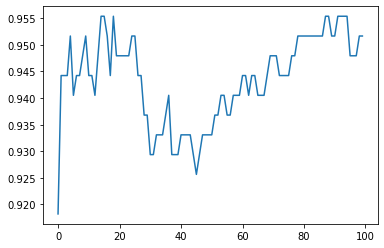

In [ ]:
error_rates = []
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(np.mean(new_predictions != y_test_data))

plt.plot(error_rates)

Модель 3. Предсказание цен.

Также была построена модель для предсказания цен конкурентов на характеристики.

Была взята настоящая цена, бренд и характеристики ноутбука.Что бы предсказать какие характеристики продавать за какую цену.

In [ ]:
x = df[['brand_num', 'processor_name_num']]
y = df['latest_price']
knn = knn.fit(x, y)

In [ ]:
test = pd.DataFrame()
test['processor_name_num'] = [2]
test['latest_price'] = [0.5]
prediction = knn.predict(test)

print(prediction)

[46990]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- latest_price
Feature names seen at fit time, yet now missing:
- brand_num

  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
clf = SVC() 
clf.fit(x, y)
SVC()
clf.support_vectors_
clf.support_
clf.n_support_

array([ 1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  4,  1,  3,  5,
        3,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,
        5,  1,  1,  3,  1,  1,  1,  3,  1,  9,  1,  2,  6,  1,  1,  1,  7,
        1,  1,  1,  1,  1,  1,  1,  9,  2,  5,  1, 12,  1,  3,  1,  1,  2,
        1,  1,  7,  1,  1,  1,  4,  1,  1,  1, 10,  1,  1,  1,  1,  6,  1,
       11,  1,  1,  1,  2,  1,  1,  1,  2,  4,  1,  1,  1,  1,  4,  1,  1,
        1,  1,  6,  3,  1,  1,  5,  1,  1,  1,  1,  4,  1,  5,  1,  2,  1,
        1,  1, 10,  1,  1,  2,  1,  1,  1,  1, 10,  1,  4,  1,  1,  3,  1,
        1,  1,  1,  1, 10,  1,  1,  1,  1,  5,  1,  1,  1, 14,  1,  5,  1,
        9,  3,  2,  1,  1,  7,  1,  1,  1, 10,  4,  1,  1,  1,  1,  9,  1,
        5,  1, 15,  4,  1,  1,  5,  1,  1,  1,  1,  1,  1,  5,  1,  1,  1,
        1,  2,  1,  4,  1,  9,  1, 15,  1,  3,  8,  3,  2,  1,  1,  1,  3,
        1,  1,  2,  1,  2,  1,  2,  1,  1,  3,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  6,  1

In [ ]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(pred, y_test)

[84955.12265976 79035.579843   78885.42832474 84499.71606879
 48507.00636549 79239.72762516 79648.02318948 78815.72838529
 49064.60588106 48287.15490778 48287.15490778 85363.41822408
 79648.02318948 79035.579843   82192.01862868 94498.21476072
 79717.72312892 84701.21644875 96310.41318633 48287.15490778
 78815.72838529 82192.01862868 49119.44971197 79717.72312892
 79105.27978245 78885.42832474 48813.34707225 84701.21644875
 49119.44971197 78815.72838529 78885.42832474 48507.00636549
 96418.40571412 86965.93599609 49119.44971197 79183.7981602
 53257.48725309 49119.44971197 94796.58459618 96418.40571412
 48255.74755668 79035.579843   85194.91562807 96873.81230509
 78815.72838529 48287.15490778 48287.15490778 79035.579843
 48813.34707225 96310.41318633 78815.72838529 94466.80740962
 79239.72762516 97282.1078694  79648.02318948 78885.42832474
 48255.74755668 79035.579843   48813.34707225 57882.10066924
 79114.09822075 82192.01862868 78784.32103419 48287.15490778
 49119.44971197 94796.58459

In [ ]:
x_test[0]

array([0.16471752, 0.5673501 ])

In [ ]:
clf.support_vectors_
clf.support_
clf.n_support_

array([ 1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  4,  1,  3,  5,
        3,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,
        5,  1,  1,  3,  1,  1,  1,  3,  1,  9,  1,  2,  6,  1,  1,  1,  7,
        1,  1,  1,  1,  1,  1,  1,  9,  2,  5,  1, 12,  1,  3,  1,  1,  2,
        1,  1,  7,  1,  1,  1,  4,  1,  1,  1, 10,  1,  1,  1,  1,  6,  1,
       11,  1,  1,  1,  2,  1,  1,  1,  2,  4,  1,  1,  1,  1,  4,  1,  1,
        1,  1,  6,  3,  1,  1,  5,  1,  1,  1,  1,  4,  1,  5,  1,  2,  1,
        1,  1, 10,  1,  1,  2,  1,  1,  1,  1, 10,  1,  4,  1,  1,  3,  1,
        1,  1,  1,  1, 10,  1,  1,  1,  1,  5,  1,  1,  1, 14,  1,  5,  1,
        9,  3,  2,  1,  1,  7,  1,  1,  1, 10,  4,  1,  1,  1,  1,  9,  1,
        5,  1, 15,  4,  1,  1,  5,  1,  1,  1,  1,  1,  1,  5,  1,  1,  1,
        1,  2,  1,  4,  1,  9,  1, 15,  1,  3,  8,  3,  2,  1,  1,  1,  3,
        1,  1,  2,  1,  2,  1,  2,  1,  1,  3,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  6,  1

In [ ]:
pred = model.predict(x_test)
pred, y_test
clf.support_vectors_

array([[0.683, 0.695],
       [0.895, 0.212],
       [0.612, 0.212],
       ...,
       [0.678, 0.678],
       [0.651, 0.679],
       [0.893, 0.636]])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:
pred = model.predict(x_test)
mean_absolute_percentage_error(y_test, pred) 

0.3597558707057741

In [ ]:
modeltree = DecisionTreeRegressor(max_depth=2)
modeltree.fit(x_train, y_train) 

DecisionTreeRegressor(max_depth=2)

In [ ]:
predtree = modeltree.predict(x_test)
mean_absolute_percentage_error(y_test, predtree)

0.3021041349941723

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'prec': 'precision'}
scoring

{'accuracy': make_scorer(accuracy_score), 'prec': 'precision'}

In [ ]:
modeltree = DecisionTreeRegressor(max_depth=2)
mean_absolute_percentage_error(y_test, predtree)

0.3021041349941723

Развертывание будет в виде веб приложения.